<a href="https://colab.research.google.com/github/jamescavanagh/unpackAI/blob/main/EEG_Alchoholism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz mne
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.8 MB/s 
     |████████████████████████████████| 60 kB 7.3 MB/s 
     |████████████████████████████████| 6.9 MB 37.8 MB/s 
     |████████████████████████████████| 188 kB 67.9 MB/s 
     |████████████████████████████████| 1.2 MB 47.0 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 51 kB 272 kB/s 
Mounted at /content/gdrive


In [2]:


import numpy as np
import pandas as pd 
import random
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import robust_scale
import mne
import matplotlib 
from collections import defaultdict
from math import cos, sin, acos, radians, pi
from scipy.interpolate import griddata
from numpy import newaxis
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Imports

In [3]:
from fastbook import *

import numpy as np
import pandas as pd 
import os
import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import files
files.upload() # Upload plotting_10005.txt

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json

Saving plotting_1005.txt to plotting_1005.txt
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
#from kaggle import api
#files.upload()

In [ ]:
!ls

SMNI_CMI_TEST  SMNI_CMI_TRAIN


In [7]:
! mkdir '/home/james'
!mv 'plotting_1005.txt' '/home/james/plotting_1005.txt'

In [8]:
gdrivePath = '/content/drive/MyDrive/Colab_Data/EEG'
%cd '/content/drive/MyDrive/Colab_Data/EEG'
#!kaggle datasets download nnair25/Alcoholics
files.upload()


#if not path.exists():
#path.mkdir(parents=true)
#api.competition_download_cli('favorita-grocery-sales-forecasting', path=gdrivePath)
#file_extract(os.path.join(gdrivePath,'favorita-grocery-sales-forecasting.zip'))

#path.ls(file_type='text')

/content/drive/MyDrive/Colab_Data/EEG


{}

In [ ]:
robertoostenveld.nl/electrodes/plotting_1005.txt

In [ ]:
#file_extract(os.path.join(gdrivePath,'Alchoholics.zip'))

NameError: ignored

In [9]:
eegPath =  os.path.join(gdrivePath,'Alchoholics.zip')

In [ ]:
#!unzip Alcoholics.zip

Archive:  Alcoholics.zip
  inflating: SMNI_CMI_TEST/Data1.csv  
  inflating: SMNI_CMI_TEST/Data10.csv  
  inflating: SMNI_CMI_TEST/Data100.csv  
  inflating: SMNI_CMI_TEST/Data101.csv  
  inflating: SMNI_CMI_TEST/Data102.csv  
  inflating: SMNI_CMI_TEST/Data103.csv  
  inflating: SMNI_CMI_TEST/Data104.csv  
  inflating: SMNI_CMI_TEST/Data105.csv  
  inflating: SMNI_CMI_TEST/Data106.csv  
  inflating: SMNI_CMI_TEST/Data107.csv  
  inflating: SMNI_CMI_TEST/Data108.csv  
  inflating: SMNI_CMI_TEST/Data109.csv  
  inflating: SMNI_CMI_TEST/Data11.csv  
  inflating: SMNI_CMI_TEST/Data110.csv  
  inflating: SMNI_CMI_TEST/Data111.csv  
  inflating: SMNI_CMI_TEST/Data112.csv  
  inflating: SMNI_CMI_TEST/Data113.csv  
  inflating: SMNI_CMI_TEST/Data114.csv  
  inflating: SMNI_CMI_TEST/Data115.csv  
  inflating: SMNI_CMI_TEST/Data116.csv  
  inflating: SMNI_CMI_TEST/Data117.csv  
  inflating: SMNI_CMI_TEST/Data118.csv  
  inflating: SMNI_CMI_TEST/Data119.csv  
  inflating: SMNI_CMI_TEST/Data12.cs

In [12]:
filenames_list = os.listdir('SMNI_CMI_TRAIN/') ## list of file names in the directory
filenames_list = [ x for x in filenames_list if x.startswith('D')]

In [ ]:

# removes a stray directory 

1

In [13]:


EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file
EEG_data_control = pd.DataFrame({})
number = 0


for file_name in filenames_list:
    temp_df = pd.read_csv('SMNI_CMI_TRAIN/Train/' + file_name, engine = 'c') ## read from the file to df
    number += 1
    
    if 'a' in temp_df['subject identifier'].values: # For alcoholic group
                    
        EEG_data = EEG_data.append(temp_df) ## add the file data to the main df
        
        
    if 'c' in temp_df['subject identifier'].values: # For control group
                    
        EEG_data_control = EEG_data_control.append(temp_df) ## add the file data to the main df





In [16]:
EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1)


In [17]:
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name  

## replace some 'sensor position' values
EEG_data.loc[EEG_data['sensor position'] == 'AF1', 'sensor position'] = 'AF3'
EEG_data.loc[EEG_data['sensor position'] == 'AF2', 'sensor position'] = 'AF4'
EEG_data.loc[EEG_data['sensor position'] == 'PO1', 'sensor position'] = 'PO3'
EEG_data.loc[EEG_data['sensor position'] == 'PO2', 'sensor position'] = 'PO4'

EEG_data.loc[EEG_data['sensor position'] == 'FP1', 'sensor position'] = 'Fp1'
EEG_data.loc[EEG_data['sensor position'] == 'FP2', 'sensor position'] = 'Fp2'
EEG_data.loc[EEG_data['sensor position'] == 'CPZ', 'sensor position'] = 'CPz'
EEG_data.loc[EEG_data['sensor position'] == 'FZ', 'sensor position'] = 'Fz'

EEG_data.loc[EEG_data['sensor position'] == 'CZ', 'sensor position'] = 'Cz' ## exclusion of this position because it has a systematically extrem value

EEG_data.loc[EEG_data['sensor position'] == 'PZ', 'sensor position'] = 'Pz'
EEG_data.loc[EEG_data['sensor position'] == 'FPZ', 'sensor position'] = 'Fpz'
EEG_data.loc[EEG_data['sensor position'] == 'AFZ', 'sensor position'] = 'AFz'
EEG_data.loc[EEG_data['sensor position'] == 'FCZ', 'sensor position'] = 'FCz'

EEG_data.loc[EEG_data['sensor position'] == 'POZ', 'sensor position'] = 'POz'
EEG_data.loc[EEG_data['sensor position'] == 'OZ', 'sensor position'] = 'Oz'

In [18]:
###same for control

EEG_data_control = EEG_data_control.drop(['Unnamed: 0'], axis=1) ## remove the unused column
EEG_data_control.loc[EEG_data_control['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name    
## replace some 'sensor position' values
EEG_data_control.loc[EEG_data_control['sensor position'] == 'AF1', 'sensor position'] = 'AF3'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'AF2', 'sensor position'] = 'AF4'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'PO1', 'sensor position'] = 'PO3'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'PO2', 'sensor position'] = 'PO4'

EEG_data_control.loc[EEG_data_control['sensor position'] == 'FP1', 'sensor position'] = 'Fp1'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'FP2', 'sensor position'] = 'Fp2'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'CPZ', 'sensor position'] = 'CPz'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'FZ', 'sensor position'] = 'Fz'

EEG_data_control.loc[EEG_data_control['sensor position'] == 'CZ', 'sensor position'] = 'Cz' ## exclusion of this position because it has a systematically extrem value

EEG_data_control.loc[EEG_data_control['sensor position'] == 'PZ', 'sensor position'] = 'Pz'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'FPZ', 'sensor position'] = 'Fpz'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'AFZ', 'sensor position'] = 'AFz'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'FCZ', 'sensor position'] = 'FCz'

EEG_data_control.loc[EEG_data_control['sensor position'] == 'POZ', 'sensor position'] = 'POz'
EEG_data_control.loc[EEG_data_control['sensor position'] == 'OZ', 'sensor position'] = 'Oz'

In [15]:
Alc_base = EEG_data['trial number'].unique()
Con_base = EEG_data_control['trial number'].unique()

In [20]:
Alc_base

array([15, 13, 18,  0, 16, 14,  9, 22, 21, 23, 47,  6, 37, 19, 20, 35, 10, 33, 31, 17,  5, 39, 12, 25,  8, 41, 11, 27, 29,  2, 55,  3, 51,  7, 24,  4, 28, 45, 43, 49, 57, 59, 61, 26, 71, 65])

In [162]:
EEG_data[EEG_data['trial number'] == 7].head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,7,Fp1,0,12.838,a,S2 nomatch,0,co2a0000371,0.000000
1,7,Fp1,1,127.584,a,S2 nomatch,0,co2a0000371,0.003906
2,7,Fp1,2,111.959,a,S2 nomatch,0,co2a0000371,0.007812
3,7,Fp1,3,-7.670,a,S2 nomatch,0,co2a0000371,0.011719
4,7,Fp1,4,-79.936,a,S2 nomatch,0,co2a0000371,0.015625


In [ ]:
len(Con_base)

61

In [27]:

#lstp_Alc1 = int(round((len(Alc_base)/100)*33.33))
#lstp_Alc2 = int(round((len(Alc_base)/100)*66.66))

lstp_Alc1 = int(round((len(Alc_base)/100)*0.00))
lstp_Alc2 = int(round((len(Alc_base)/100)*95.00))

Alc_train_extractor = Alc_base #[:lstp_Alc1]
Alc_train_classifier =Alc_base#[lstp_Alc1:lstp_Alc2]
Alc_test = Alc_base[lstp_Alc2:]

#Alc_group  # ORIGINAL CODE
#lstp_Con1 = int(round((len(Con_base)/100)*33.33))
#lstp_Con2 = int(round((len(Con_base)/100)*66.66))

lstp_Con1 = int(round((len(Con_base)/100)*0.00))
lstp_Con2 = int(round((len(Con_base)/100)*95.00))


Con_train_extractor = Con_base[:lstp_Con1]
Con_train_classifier = Con_base[lstp_Con1:lstp_Con2]
Con_test = Con_base[lstp_Con2:]



In [21]:
Con_group = Con_base
Alc_group = Alc_base

In [22]:
# input the dataframes into it

In [23]:

def trialfunction(input_data):
    
    trials_dic = {}
    
    dbc = 0
    
    if Alc_train_extractor.shape == Con_train_extractor.shape:
        
        print('Same shape error:')
        print(X_train.shape)
        print(y_train.shape)
        raise SystemExit 
    
    if (input_data.shape == Alc_train_extractor.shape) or (input_data.shape == Alc_train_classifier.shape) or (input_data.shape == Alc_test.shape):
        dbc = EEG_data
        
        
    if (input_data.shape == Con_train_extractor.shape) or (input_data.shape == Con_train_classifier.shape) or (input_data.shape == Con_test.shape):
        dbc = EEG_data_control
        
    
    for pos in input_data:               
        
        Trial = dbc.loc[dbc['trial number'] == pos]
    
        columns =['channel','time', 'sensor value']
 
        Trial = Trial.pivot_table(index='channel', columns='time', values = 'sensor value')
    
        trials_dic[pos] = Trial



    RGB_dic = {}
    
 

    for key in trials_dic:
        data = trials_dic.get(key)

        # Get real amplitudes of FFT (only in postive frequencies)

        fft_raw = fft(data)

        fft_vals = np.absolute(fft_raw)

        fft_vals = normalize(fft_vals, axis=1)

        # Get frequencies for amplitudes in Hz

        fs = 256    # Sampling rate

        fft_freq = fftfreq(fs, 1.0/fs)

        # Define EEG bands
        eeg_bands = {'Theta': (4, 7),
                 'Alpha': (8, 12),
                 'Beta': (13, 30),
                 }
    
        # Take the  sum of squared absolute values/amplitudes for each EEG band

        eeg_band_fft = defaultdict(list)

        for band in eeg_bands:  
        
    
            freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                               (fft_freq <= eeg_bands[band][1]))[0]
    

           
            for channel in fft_vals:
        
                filterdch = channel[freq_ix]
               
                sqdvals = np.square(filterdch)
               
                sumvals = np.sum(sqdvals, axis=0)
                
                eeg_band_fft[band].append(sumvals)
               



        extracted_df =  pd.DataFrame(eeg_band_fft)

    
   

        neeg = EEG_data.drop(columns=['matching condition','name','trial number', 'subject identifier','time', 'sample num', 'sensor value'])

        neeg = neeg.drop_duplicates()


        #get names of source elctrodes:

        extracted_df = extracted_df.reset_index(drop=True)
        neeg = neeg.reset_index(drop=True)



        e_names =  neeg
        e_names = e_names.rename(columns = {'sensor position' : 0})



        extracted_df = extracted_df.join(neeg)


        #get coordinates in 3d from robertoostenveld.nl/electrodes/plotting_1005.txt

        coords = pd.read_csv('/home/james/plotting_1005.txt', sep='\t',  header = None)

        coords = coords.drop(coords.columns[4], axis=1)

        #print(coords)
        testerd = pd.merge(e_names, coords, on=0,  how='inner')


        testerd.set_index('channel', inplace=True)

        testerd.columns = ['pos','x', 'y', 'z']


        extracted_df = extracted_df.rename(columns={'sensor position': "pos"})

        #filter values and coordinates
        extracted_df = pd.merge(extracted_df, testerd, on="pos", how='inner')
        extracted_df = extracted_df.drop(['x','y','z'], axis=1)
        extracted_df.set_index('channel', inplace=True)

        extracted_df = extracted_df.drop(columns=['pos'])
        extracted_df.index.names = ['pos']

      
        #adapted from https://www.samuelbosch.com/2014/02/azimuthal-equidistant-projection.html

        class Point(object):
            def __init__(self,x, y, z):
                self.x = x
                self.y = y
                self.z = z

        class AzimuthalEquidistantProjection(object):
            """ 
                http://mathworld.wolfram.com/AzimuthalEquidistantProjection.html
                http://mathworld.wolfram.com/SphericalCoordinates.html
            """
            def __init__(self):
    
                self.t1 = pi / 2 ## polar latitude center of projection , https://en.wikipedia.org/wiki/Azimuthal_equidistant_projection
                self.l0 = 0 ## arbitrary longitude center of projection
                self.cost1 = cos(self.t1)
                self.sint1 = sin(self.t1)
        
            def project(self, point):
        
                #ADDAPTED FOR 3D CARTESIAN TO SPHERICAL 
        
                hxy = np.hypot(point.x, point.y)
        
                t = np.arctan2(point.z, hxy)
                l = np.arctan2(point.y, point.x)
        
                ###
        
                costcosll0 = cos(t) * cos(l-self.l0)
                sint = sin(t)
        
                c = acos ((self.sint1) * (sint) + (self.cost1) * costcosll0)
                k = c / sin(c)
        
                x = k * cos(t) * sin(l-self.l0)
                y = k * (self.cost1 * sint - self.sint1 * costcosll0)
                return x, y


        
        #Projection df

        projected_df =  pd.DataFrame()

        for index, row in testerd.iterrows():
    
            x = row['x']
            y = row['y']
            z = row['z']
    
    
            p = AzimuthalEquidistantProjection()
            r = p.project(Point(x,y,z))
    
            r = pd.Series(r)
    
            projected_df = projected_df.append(r,ignore_index=True)
    

        projected_df =  projected_df.rename(columns={0: 'X',1: 'Y'})


        ###map coodinate with valuies

        new_df = projected_df.join(extracted_df)
        new_df = new_df.drop([31]) # drop row because i contains no values
        #print(new_df)

        Theta_df = new_df.drop(['Alpha','Beta','X','Y'], axis=1)
        Alpha_df = new_df.drop(['Theta','Beta','X','Y'], axis=1)
        Beta_df = new_df.drop(['Theta','Alpha','X','Y'], axis=1)
        

        #map onto mesh

        xpoints = np.array(new_df[['X']].squeeze())
        ypoints = np.array(new_df[['Y']].squeeze())

        Thetavalues = np.array(Theta_df).squeeze()
        Alphavalues = np.array(Alpha_df).squeeze()
        Betavalues = np.array(Beta_df).squeeze()
        

        xx,yy = np.mgrid[-1.5:1.5:32j, -1.5:1.5:32j]

        Thetavalues = minmax_scale(Thetavalues,feature_range=(0.0, 1.0), axis=0)
        Alphavalues = minmax_scale(Alphavalues,feature_range=(0.0, 1.0), axis=0)
        Betavalues = minmax_scale(Betavalues,feature_range=(0.0, 1.0), axis=0)


        Thetagrid = griddata((xpoints, ypoints), Thetavalues, (xx, yy),method='cubic', fill_value = 0.0)
        Alphagrid = griddata((xpoints, ypoints), Alphavalues, (xx, yy),method='cubic', fill_value = 0.0)
        Betagrid = griddata((xpoints, ypoints), Betavalues, (xx, yy),method='cubic', fill_value = 0.0)
     

        ##RGB construction

        RGB = np.empty((32, 32, 3))

        RGB[:,:,0] = Thetagrid
        RGB[:,:,1] = Alphagrid
        RGB[:,:,2] = Betagrid
    
    
    
        RGB_dic[key] = RGB


        
    ##creating new dict with new keys

    lendict = len(RGB_dic)
    #print('lendict: ',lendict)

    lenlist=np.arange(0,lendict)

    #print(lenlist)

    final_dict = dict(zip(lenlist, list(RGB_dic.values()))) 
    
    
    return final_dict

In [24]:
class EEGRGBDataset(Dataset):

    def __init__(self, file, transform=None):
        
        self.file = file
        self.transform = transform
        
    def __len__(self):
        return len(self.file)


    def __getitem__(self, idx): 
          
        sample = self.file[idx]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

####Tensor transform


class ToTensor(object):
    def __call__(self, sample):

        sample = sample.transpose((2, 0, 1))
        sample = torch.tensor(sample, dtype = torch.float, device = device)

        return sample 

In [163]:
#alc_dict = trialfunction(Alc_group)
#con_dict  = trialfunction(Con_group)

In [29]:
### Function Call

final_dict1 = trialfunction(Alc_train_extractor)
final_dict2 = trialfunction(Con_train_extractor)
final_dict3 = trialfunction(Alc_train_classifier)
final_dict4 = trialfunction(Con_train_classifier)    
final_dict5 = trialfunction(Alc_test)
final_dict6 = trialfunction(Con_test)

##

eeg_dataset1 = EEGRGBDataset(final_dict1)
eeg_dataset2 = EEGRGBDataset(final_dict2)

eeg_dataset3 = EEGRGBDataset(final_dict3)
eeg_dataset4 = EEGRGBDataset(final_dict4)

eeg_dataset5 = EEGRGBDataset(final_dict5)
eeg_dataset6 = EEGRGBDataset(final_dict6)

##
    
transformed_dataset1 = EEGRGBDataset(eeg_dataset1, transform=transforms.Compose([ToTensor()]))
transformed_dataset2 = EEGRGBDataset(eeg_dataset2, transform=transforms.Compose([ToTensor()]))

transformed_dataset3 = EEGRGBDataset(eeg_dataset3, transform=transforms.Compose([ToTensor()]))
transformed_dataset4 = EEGRGBDataset(eeg_dataset4, transform=transforms.Compose([ToTensor()]))

transformed_dataset5 = EEGRGBDataset(eeg_dataset5, transform=transforms.Compose([ToTensor()]))
transformed_dataset6 = EEGRGBDataset(eeg_dataset6, transform=transforms.Compose([ToTensor()]))

In [ ]:
final_dict1 = trialfunction(Alc_train_extractor)
final_dict2 = trialfunction(Con_train_extractor)
final_dict3 = trialfunction(Alc_train_classifier)
final_dict4 = trialfunction(Con_train_classifier)    
final_dict5 = trialfunction(Alc_test)
final_dict6 = trialfunction(Con_test)

In [30]:
alc_group  = {**final_dict1, **final_dict3,**final_dict5}
con_group =  {**final_dict2, **final_dict4,**final_dict6}

In [31]:
# Converting and saving to images
from PIL import Image

# See why there are so few images


In [34]:
# Changing the directory


!mkdir /home/james/EEG_Images
%cd /home/james/EEG_Images


/home/james/EEG_Images


In [35]:
!mkdir /home/james/EEG_Images/Alc
!mkdir /home/james/EEG_Images/Con

In [88]:
def save_array_as_image(inputDict,is_alc):
 # for i, (key,value) in enumerate(inputDict.items()):
  if is_alc == True:
     is_alc = '_alc'
  else:
     is_alc = '_con'

  for k,v in inputDict.items():
    imName = str(k) + is_alc + '.jpg'
    im = Image.fromarray((v * 255).astype(np.uint8))
    im.save(imName)

In [91]:
%cd /home/james/EEG_Images/Con
save_array_as_image(con_group,is_alc=False)

/home/james/EEG_Images/Con


In [92]:
%cd /home/james/EEG_Images/Alc
save_array_as_image(con_group,is_alc=True)

/home/james/EEG_Images/Alc


In [114]:
# Using oversampling to correct unbalanced classes 
# 

def double_control_images(inputDict):
 # for i, (key,value) in enumerate(inputDict.items()):

  for k,v in inputDict.items():
    imName = str(k) + '_control_duplicate.jpg'
    im = Image.fromarray((v * 255).astype(np.uint8))
    im.save(imName)

In [ ]:
%cd /home/james/EEG_Images/Con
double_control_images(con_group)

# Start FastAI

In [112]:
###### Start FastAI
%cd /home/james/

root_dir = "/home/james/EEG_Images"
EEG_Con_Path = os.path.join(root_dir,'Con')
EEG_Alc_Path = os.path.join(root_dir,'Alc')

List_EEG_Con = [os.path.join(EEG_Con_Path, f) for f in os.listdir(EEG_Con_Path)]
List_EEG_Alc = [os.path.join(EEG_Alc_Path, f) for f in os.listdir(EEG_Alc_Path)]


/home/james


In [113]:
NumOfControlImages = len(List_EEG_Con) 
NumOfAlchImages = len(List_EEG_Alc) 

print(f'Control Group size {NumOfControlImages}')
print(f'Alcholic Group size: {NumOfAlchImages}')

Control Group size 116
Alcholic Group size: 117


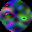

In [116]:
picked_image = 3
im = Image.open(List_EEG_Alc[picked_image])
im.to_thumb(,64)

In [131]:
example.shape

(32, 32, 3)

# DataLoader Step

In [122]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i, self: self[i])

In [132]:
EEGs = DataBlock (
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=99),
    get_y=parent_label,
    item_tfms=Resize(32,32))

In [133]:
dls = EEGs.dataloaders
destination =Path(root_dir)
path = destination
fns = get_image_files(path)
dls = EEGs.dataloaders(path)

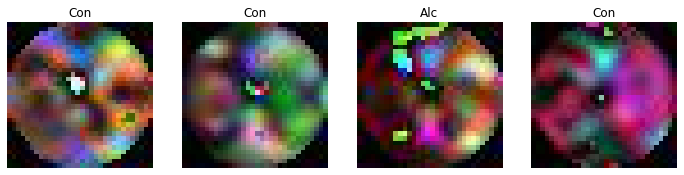

In [134]:
dls.valid.show_batch(max_n=4, nrows=1)

In [154]:
EEGs = EEGs.new(
    item_tfms=RandomResizedCrop(28, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = EEGs.dataloaders(path)

In [167]:
EEGs = EEGs.new(
    #item_tfms=RandomResizedCrop(28, min_scale=0.5),
)
dls = EEGs.dataloaders(path)

In [168]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.136196,0.957783,0.456522,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.355866,0.914031,0.565217,00:03
1,1.352101,0.832371,0.500000,00:03
2,1.317562,0.809979,0.500000,00:03
3,1.363952,0.837449,0.456522,00:03
4,1.320979,0.898485,0.543478,00:03
5,1.289169,0.998841,0.565217,00:03
6,1.286456,1.058513,0.565217,00:03
7,1.297243,1.064245,0.586957,00:03
8,1.289634,1.099969,0.608696,00:03
9,1.272477,1.145135,0.695652,00:03


In [144]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.289286,1.110221,0.543478,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.289459,1.030589,0.565217,00:03
1,1.295561,0.894677,0.565217,00:03
2,1.306561,0.807930,0.673913,00:03
3,1.311664,0.789714,0.478261,00:03
4,1.259563,0.829569,0.456522,00:03
5,1.244618,0.868328,0.478261,00:03
6,1.234434,0.894590,0.456522,00:03
7,1.262686,0.914215,0.500000,00:03
8,1.245561,0.906831,0.543478,00:03
9,1.249292,0.921071,0.543478,00:03


In [145]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.166340,1.236900,0.565217,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.393274,0.926728,0.521739,00:04
1,1.382661,0.764474,0.434783,00:04
2,1.381845,0.760256,0.456522,00:04
3,1.315685,0.832241,0.543478,00:04
4,1.304718,0.855730,0.565217,00:04
5,1.335161,0.866074,0.500000,00:04


In [149]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.024580,1.349285,0.456522,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.963956,0.962216,0.391304,00:04
1,1.217649,0.935959,0.456522,00:04
2,1.276702,0.931983,0.478261,00:04
3,1.251487,0.924609,0.543478,00:04
4,1.244824,0.960708,0.500000,00:04
5,1.244239,1.022295,0.565217,00:04


In [157]:
# Cross Entroy Punction

learnCrossEntropy = Learner(dls, xresnet18(n_out=dls.c), loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy)
learnCrossEntropy.fit_one_cycle(8, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.186365,0.723376,0.456522,00:03
1,1.040027,0.706047,0.543478,00:03
2,1.042961,0.814078,0.543478,00:03
3,1.057756,0.706313,0.456522,00:03
4,1.038622,0.741870,0.434783,00:03
5,1.011618,0.741350,0.456522,00:03
6,0.995503,0.755338,0.478261,00:03
7,0.968950,0.774955,0.500000,00:02


In [ ]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=MixUp())
learn.fit_one_cycle(5, 3e-3)

In [158]:
learnCrossEntropy = Learner(dls, xresnet18(n_out=dls.c), loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy)
learnCrossEntropy.fine_tune(8, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.882473,0.692415,0.521739,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.767737,0.710190,0.543478,00:02
1,0.779525,0.714629,0.434783,00:02
2,0.762939,0.714848,0.391304,00:02
3,0.769895,0.712651,0.478261,00:02
4,0.764957,0.733108,0.369565,00:02
5,0.770882,0.751816,0.369565,00:02
6,0.776051,0.777267,0.347826,00:03
7,0.777981,0.802976,0.347826,00:02


In [159]:
# Mix up


model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=MixUp())
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.869569,1.182874,0.456522,00:06
1,1.739503,1.329592,0.456522,00:05
2,1.728356,0.817060,0.543478,00:05
3,1.635465,1.030805,0.543478,00:05
4,1.618341,1.087041,0.543478,00:05


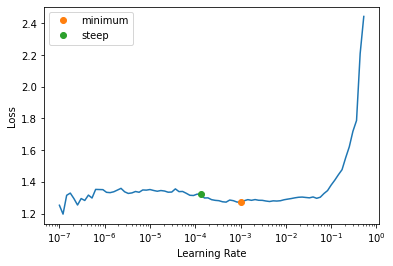

In [161]:
# Learning Rate 
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [56]:
dls.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


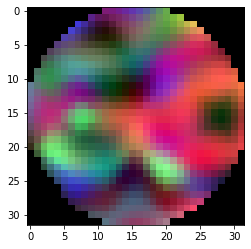

In [57]:
plt.imshow(final_dict1[7])

In [55]:
fin

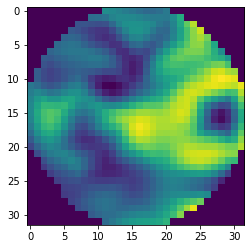

In [148]:

# Theta grid
plt.imshow(example[:,:,0])


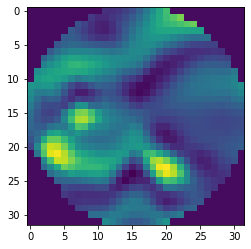

In [147]:
# Beta Grid
plt.imshow(example[:,:,1])


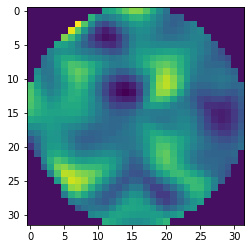

In [146]:
#alpha grid 
plt.imshow(example[:,:,2])

In [ ]:
DataBlock

In [ ]:
type(transformed_dataset1)

__main__.EEGRGBDataset

In [ ]:
DataBlock(blocks=(ImageBlock),
          get_i
          
          )